Import and clean the teacher data

In [1]:
import pandas as pd

df = pd.read_excel("/Users/douglasjohnson/Documents/IDinsight/Projects/STiR/20160624_List of teachers.xlsx")

In [2]:
temp = df.groupby('schoolcode').count()['teacherCode']

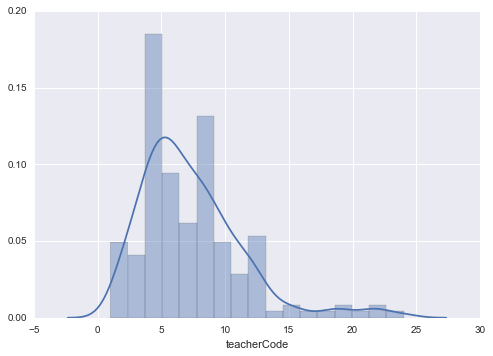

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(temp)

In [4]:
temp.mean()

7.388888888888889

# Power calculations
Estimate power / MDE / required sample size for analysis looking at a single 4 point likert scale question

Starting assumptions:
1. Effect size = .1  (According to [this article](https://www.washingtonpost.com/blogs/monkey-cage/wp/2014/12/19/pushing-at-an-open-door-when-can-personal-stories-change-minds-on-gay-rights/) a 0.8 effect size is massive so .1 seems be reasonable)
2. standard deviation = .5 (this roughly corresponds to the case where there are 15% 1s, 35% 2s, 35% 3s, and 15% 4s.
3. rho = .22 (Copying this from Stuart's original do file)
4. no covariates at either the school or teacher level
5. 80 schools (there are actually 120 treatment and 60 control.  this seems close to the harmonic mean)

Calculating MDE using the following formula

$$ MDE = 2M_J\sigma_y\sqrt{\frac{\rho}{J}+\frac{1-\rho}{JK}} $$

Where...

$$ M_J = F^{-1}_t\left(1-\frac{\alpha}{2},J\right) + F^{-1}_t\left(1-\beta,J\right) $$

In [62]:
import scipy.stats as stats

std = .5
rho = .22
J = 80
K = 10
alpha = .05
M = stats.t.ppf(1-alpha/2,J)+stats.t.ppf(.8,J)
MDE = 2*M*std*((rho/J) +(1-rho)/(J*K))**.5
MDE

0.17310121211865287

In [37]:
Mt = stats.t.ppf(.975,J)+stats.t.ppf(.8,J)
Mnorm = stats.norm.ppf(.975)+stats.norm.ppf(.8)
Mt,Mnorm

(2.8574283540981225, 2.8015852181129683)

In [67]:
import numpy as np
np.linspace(0,10,50)

array([  0.        ,   0.20408163,   0.40816327,   0.6122449 ,
         0.81632653,   1.02040816,   1.2244898 ,   1.42857143,
         1.63265306,   1.83673469,   2.04081633,   2.24489796,
         2.44897959,   2.65306122,   2.85714286,   3.06122449,
         3.26530612,   3.46938776,   3.67346939,   3.87755102,
         4.08163265,   4.28571429,   4.48979592,   4.69387755,
         4.89795918,   5.10204082,   5.30612245,   5.51020408,
         5.71428571,   5.91836735,   6.12244898,   6.32653061,
         6.53061224,   6.73469388,   6.93877551,   7.14285714,
         7.34693878,   7.55102041,   7.75510204,   7.95918367,
         8.16326531,   8.36734694,   8.57142857,   8.7755102 ,
         8.97959184,   9.18367347,   9.3877551 ,   9.59183673,
         9.79591837,  10.        ])